# Приватные и публичные атрибуты

## Приватные и публичные атрибуты в других языках

Многие языки программирования дают программисту возможность добавлять к атрибутам объектов различные модификаторы, которые будут влиять на доступность этого атрибута из разных мест программы.

Разберём это на примере кода на **C#**

```C#
class State
{
    private string privateVar = "private";
    protected string protectedVar = "protected";
    public string publicVar = "public";
}

```

Здесь мы видим три основных модификатора (на самом деле их немного больше): **private**, **protected** и **public**

1. `public` показывает, что атрибут является **публичным** (логично, блин). Это значит, что получить доступ к данному атрибуту можно из любой точки программы, в частности:
    + Внутри данного класса
    + Внутри наследников данного класса
    + Снаружи класса
2. `protected` показывает, что атрибут является **защищённым**. Это значит, что получить доступ к данному атрибуту можно в:
    + Внутри экземпляра данного класса
    + Внутри наследников данного класса
    + Но **нельзя получить доступ снаружи** класса или его наследников
3. `private` показывает, что атрибут является **приватным**. Это значит, что получить доступ к атрибуту можно только **внутри данного класса**

## Зачем такие сложности?

Так гораздо удобнее организовывать свой код, чтобы он был более читаемым и поддерживаемым, а также не пугал конечных пользователей обилием странных атрибутов

Особенно это полезно при написании библиотек и API (про API мы поговорим позже). Пользователю библиотеки совершенно не нужно знать, что находится в её "кишках", поэтому разработчики делают основные user-friendly методы публичными, а всякие методы, которые делают под капотом всю работу, но при этом не очень удобны в использовании или не особо нужны конечному юзеру, делают приватными или защищёнными.

Суммируя, приватные и защищённые методы предназначены для использования внутри класса, скрывая от юзера снаружи класса детали его работы (так как ему это зачастую не нужно), публичные же методы, наоборот, выставляются наружу из класса и направлены на взаимодействие с юзером

## В Python

### Теория

В Python **модификаторы доступа к атрибутам отсутствуют**, хотя это довольно полезная и удобная штука. Тем не менее питон имеет альтернативу, которую мы сейчас рассмотрим

Приватные и публичные атрибуты в Python не реализованы на уровне языка, но представляют из себя конвенцию, которой следуют разработчики:

1. **"Приватные"** атрибуты принято называть, начиная имя с `__` (два нижних подчёркивания). Например, `self.__sequence = sequence`
2. **"Защищённые"** атрибуты принято называть, начиная с `_` (одно нижнее подчёркивание). Например, `self._data = data`
3. **Публичные** атрибуты называются без `_` в начале. Например, `self.labels_`. Подчёркивание в конце атрибутов ни на что не влияет, например, в sklearn так помечаются атрибуты, которые инициализируются в процессе "обучения" модели

Типы атрибутов выше не зря указаны в кавычках. В Python указание одного или двух `_` в начале имени атрибута никак (почти) не повлияет на доступность атрибута, вытащить из класса или экземпляра можно **абсолютно любой атрибут**, независимо от имени.

Как мы уже проговаривали выше, даннный нейминг это всего-лишь конвенция. Когда вы пишите код, следует соблюдать эти правила:
1. Не использовать без особой нужды **"приватные"** и **"защищённые"** атрибуты снаружи класса (хотя язык позволяет это делать)
2. Если вы не хотите, чтобы ваш атрибут кто-то использовал вне класса или в этом нет особой нужды, то сделайте его **"приватным"**
3. Если вы не хотите, чтобы ваш атрибут кто-то использовал вне класса или в этом нет особой нужды, но вы хотите, чтобы он наследовался, то сделайте его **"защищённым"** 

### Почему так?

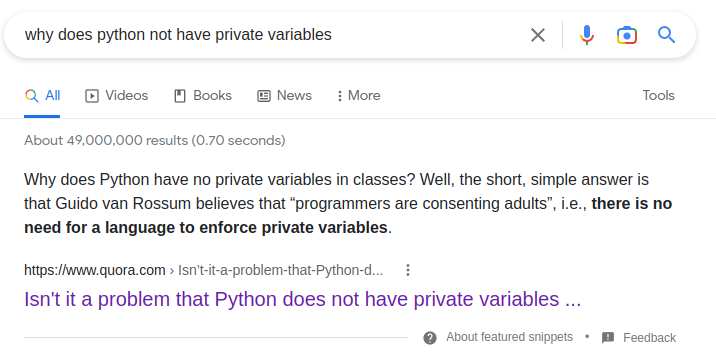

### Примеры

Посмотрим на код, чтобы убедиться, что защиты атрибутов на уровне языка нет

In [4]:
class SomeClass:
    def public_method(self):
        print("I'm public")
        
    def _protected_method(self):
        print("I'm protected")
        
    def __private_method(self):
        print("I'm private")
        
some_instance = SomeClass()

#### Получение доступа к атрибуту снаружи класса

Как работают публичные методы мы уже видели

In [5]:
some_instance.public_method()

I'm public


"Защищённый" метод работает также. Как мы видим, не такой уж он и защищённый, раз мы смогли получить его снаружи класса. По конвенции, мы не должны были так делать. Так что "защищённые" методы это те же самые публичные методы, но с другими правилами нейминга

In [6]:
some_instance._protected_method()

I'm protected


А вот "приватный" метод мы не смогли получить. Получается, что в питоне всё-таки есть честные приватные атрибуты?

In [7]:
some_instance.__private_method()

AttributeError: 'SomeClass' object has no attribute '__private_method'

Не совсем, "приватные" методы всё также доступны, но питон старательно пытается их от нас спрятать, когда мы пытаемся получить доступ снаружи класса или из наследника

"Приватный" атрибут можно получить из любого места программы при помощи следующей записи `instance._<class_name>__<attribute_name>`.

In [11]:
some_instance._SomeClass__private_method()

I'm private


Как мы видим, мы можем получить любой атрибут из класса, независимо от его имени, совсем спрятать атрибут нельзя. Пример выше также идёт против конвенции и таким образом получать доступ к "приватным" атрибутам **не надо**

#### Получение доступа к атрибуту внутри класса


Тем не менее, получить доступ к "приватным" атрибутам **внутри класса** можно обычным способом

In [14]:
class Red:
    __hex_code = "#FF0000"
    __rgb_code = (255, 0, 0)
    
    def print_info(self):
        # В строках ниже не будет ошибки, как в предыдущем примере, так как
        # внутри класса можно получать доступ к "приватным" атрибутам без костылей
        print(f"Hex code is {self.__hex_code}\n"  
              f"RGB code is {self.__rgb_code}")
        
red = Red()
red.print_info()

Hex code is #FF0000
RGB code is (255, 0, 0)


#### Получение доступа к атрибуту при наследовании

Наконец, просто посмотрим, как наследуются данные атрибуты

In [15]:
class SomeParentClass:
    def __init__(self):
        self.public_attr = "public"
        self._protected_attr = "protected"
        self.__private_attr = "private"
        
class SomeChildClass(SomeParentClass):
    def print_public(self):
        print(self.public_attr)
    
    def print_protected(self):
        print(self._protected_attr)
        
    def print_private(self):
        print(self.__private_attr)
    
        
some_instance = SomeChildClass()

some_instance.print_public()
some_instance.print_protected()
some_instance.print_private()

public
protected


AttributeError: 'SomeChildClass' object has no attribute '_SomeChildClass__private_attr'

Видим сразу два интересных момента:
1. По тексту ошибки видно, что внутри класса все "приватные" атрибуты хранятся в виде `_<class_name>__<attribute_name>`, а при попытке получения просто подставляется имя текущего класса. Т.к. данный приватный атрибут был определён в родительском классе, то он на самом деле называется `_SomeParentClass__private_attr`, а атрибута `_SomeChildClass__private_attr`, который питон попытался найти просто не существует
2. Исходя из предыдущего пункта, если мы хотим наследовать атрибут, то мы не должны делать его приватным, иначе работать это не будет (имя `_<class_name>__<attribute_name>` в расчёт мы не берём, так делать **не надо**)

# Полиморфизм

Это довольно интуитивная концепция ООП, которую тем не менее трудно объяснить. Для затравки приведено определение из википедии, если вам оно пока не понятно, то это нормально

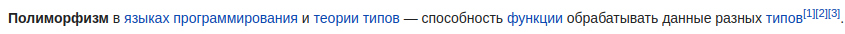

Но давайте начнём издалека

## Dunder методы в Python

Это моя самая любимая часть питона, так как благодаря этому вы можете творить настоящую магию

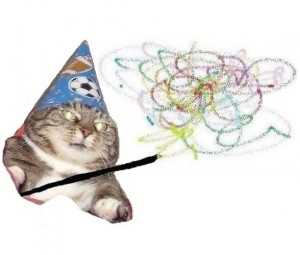

Dunder методы (**D**ouble **under**score, иногда их ещё называют **магическими**) это специальные служебные методы в питоне, которые начинаются и заканчиваются на `__`. С их помощью питон может взаимодействовать с вашими собственными объектами при помощи его внутренних функций и операторов (например, `len`, `+`, `/` и т.д.)

Далее мы просто рассмотрим некоторые популярные методы. Их очень много, поэтому при желании вы можете найти полный список самостоятельно.

### `__len__`

Данный метод позволяет объекту работать со встроенной в питон функцией `len`

In [17]:
class KittensCollection:
    def __init__(self, kittens):
        self.__kittens = kittens

        
kittens = KittensCollection(["kitten1", "kitten2", "kitten3"])
len(kittens)

TypeError: object of type 'KittensCollection' has no len()

Мы видим, что питон не понимает, как найти *длину* нашего объекта при помощи функции `len`, так как данное поведение не определено. Мы можем это изменить, добавив метод `__len__`, который будет возвращать длину нашего объекта

In [19]:
class KittensCollection:
    def __init__(self, kittens):
        self.__kittens = kittens
        
    def __len__(self):
        return len(self.__kittens)

    
kittens = KittensCollection(["kitten1", "kitten2", "kitten3"])
len(kittens)

3

Круто, теперь наш объект умеет работать с функцией `len`. Подобные методы есть практически для любых функций и операторов в питоне, так что не бойтесь изучать этот вопрос.

По-сути вызов `len(kittens)` полностью эквивалентен вызову `kittens.__len__()`, внутри `len` происходит тоже самое

Кстати, нам не обязательно возвращать именно длину внутреннего списка, мы можем вернуть абсолютно что угодно, но это должно быть число (того требует функция `len`)

In [25]:
import random

class KittensCollection:
    def __init__(self, kittens):
        self.__kittens = kittens
        
    def __len__(self):
        return random.randint(0, 10)

    
kittens = KittensCollection(["kitten1", "kitten2", "kitten3"])
len(kittens)

8

### `__str__` и `__repr__`

Данные методы позволяют объекту взаимодействовать с одноимёнными функциями без `_`. Вообще, такая логика работает для многих dunder методов

Эти два метода очень похожи

`__str__` определяет результат при преобразовании нашего объекта в класс `str`, это довольно важный метод, так как преобразование в `str` происходит внутри функции `print`. Поэтому, если вы хотите, чтобы при печати вашего объекта возвращалось не что-то в духе `'<__main__.KittensCollection object at 0x7fab6626eee0>'`, а какая-то более осмысленная информация, то можно переопределить этот метод

`__repr__` определяет результат при передаче нашего объекта в функцию `repr`. Данная функция крайне редко используется в чистом виде. Она возвращает строку, которая выводится как результат последнего выражения в ноутбуке или голом интерпретаторе. Внутри `print` используется `str`, но если у объекта не определён метод `__str__`, то будет использован `__repr__`. Короче всё сложно из-за того, что эти функции и методы слишком похожи. Дальше я приведу в каких случаях, что использовать, но потыкавшись в эти методы поглубже вы и сами разберётесь
1. Используйте `__str__`, если вам нужно, чтобы ваш объект умел преобразовываться в класс `str` (при этом при печати также будет использоваться этот метод)
2. Используйте `__repr__`, если вам нужно, чтобы ваш объект выводился как результат последнего выражения в нужном вам виде (но при этом в функции `str` тоже будет использоваться этот метод)
3. Используйте и `__str__` и `__repr__`, если вам нужны различные результаты при преобразовании в строку, печати и выводе результата последнего выражения
4. Если у вас получился код, в котором `__str__` и `__repr__` одинаковы, то можно оставить только `__repr__`

Вызов `str(obj)` эквивалентен вызову `obj.__str__()`, а вызов `repr(obj)` эквивалентен вызову `obj.__repr__()`

Здесь можно было бы привести код для всех возможных случаев, но он занял бы слишком много места

In [184]:
class KittensCollection:
    def __init__(self, kittens):
        self.__kittens = kittens
        
    def __str__(self):
        return str(len(self.__kittens))   # При преобразовании в строку мы вернём число в виде строки
    
    def __repr__(self):
        return str(self.__kittens)   # В качестве результата последнего выражения напечатаем список

    
kittens = KittensCollection(["kitten1", "kitten2", "kitten3"])
str(kittens)  # Здесь срабатывает метод __str__

'3'

In [59]:
print(kittens)  # Здесь также срабатывает метод __str__

3


In [61]:
kittens  # А здесь __repr__

['kitten1', 'kitten2', 'kitten3']

Далее приведена маленькая иллюстрация работы функции `repr`

In [55]:
class Foo:
    pass

Foo()

В качестве результата последнего выражения в примере выше выводится вот эта дичь `<__main__.Foo at 0x7fab662da1f0>`. Это результат работы метода `__repr__` по-умолчанию. Если явным образом передать этот объект в функцию `repr`, то можно получить это в виде строки

In [57]:
object_representation_str = repr(Foo())
object_representation_str[20:]

' at 0x7fab65013e80>'

### Методы для взаимодействия с операторами

К ним относятся `__add__`, `__sub__`, `__mul__`, `__div__`, `__truediv__`, `__matmul__`, `__or__`, `__and__` и так далее

Данные функции позволят вашим объектам взаимодействовать с операторами в питоне, их очень много, но мы рассмотрим всё на примере `__add__`, так как все эти функции устроены одинаково

`__add__` как вы уже догадались позволяет объекту участвовать в выражениях с оператором `+`

Поскольку в выражениях с `+` всегда есть два операнда, то данный метод будет принимать один дополнительный арумент - другой объект

In [66]:
class KittensCollection:
    def __init__(self, kittens):
        self.__kittens = kittens
        
    def __repr__(self):
        return str(self.__kittens)
        
    def __add__(self, other):   # other - это объект, который находится по правую сторону от + в выражении
        return KittensCollection(self.__kittens + other)  # Здесь мы подразумеваем, что other это список
    
    
kittens = KittensCollection(["kitten1", "kitten2", "kitten3"])
kittens + ['kitten4', 'kitten5']    # Код работает, хотя kittens это не список, это наш собственный объект

['kitten1', 'kitten2', 'kitten3', 'kitten4', 'kitten5']

Всё работает, попробуйте убрать метод `__add__` и посмотреть, что получится в таком случае

Опять же, в данных методах можно делать что угодно. Например, можно модифицировать поведение операции сложения в зависимости от типов операндов

In [67]:
class KittensCollection:
    def __init__(self, kittens):
        self._kittens = kittens
        
    def __repr__(self):
        return str(self._kittens)
        
    def __add__(self, other):   # other - это объект, который находится по правую сторону от + в выражении
        if isinstance(other, KittensCollection):  # Здесь мы подразумеваем, что other это объект того же класса
            return KittensCollection(self._kittens + other._kittens)
        
        elif isinstance(other, int):  # Здесь мы подразумеваем, что other это число
            return KittensCollection(self._kittens + [f"kitten?" for _ in range(other)])
        
        elif isinstance(other, list):  # Здесь мы подразумеваем, что other это список
            return KittensCollection(self._kittens + other)
        
        else:
            return "Meow!"
    
    
kittens1 = KittensCollection(["kitten1", "kitten2", "kitten3"])
kittens2 = KittensCollection(["kitten4", "kitten5", "kitten6"])

In [69]:
kittens1 + kittens2   # Сложение объектов работает

['kitten1', 'kitten2', 'kitten3', 'kitten4', 'kitten5', 'kitten6']

In [70]:
kittens1 + 5   # Сложение с числом работает

['kitten1', 'kitten2', 'kitten3', 'kitten?', 'kitten?', 'kitten?', 'kitten?', 'kitten?']

In [71]:
kittens1 + 5   # Сложение со списком работает

['kitten1', 'kitten2', 'kitten3', 'kitten?', 'kitten?', 'kitten?', 'kitten?', 'kitten?']

In [75]:
kittens1 + (2.5-7j)   # Сложение с комплексным числом "работает", просто потому что мы так захотели

'Meow!'

Обратите внимание, что в этом примере мы переключились с "приватного" атрибута `__kittens` на "защищённый" `_kittens`. Вопрос, почему?

### `__r<operator_func>__`

Для каждого (кажется) метода для взаимодействия с оператором существует метод с префиксом `r` (**r**ight). Он определяет поведение объекта в выражениях с соответствующим оператором, в которых наш объект стоит справа от оператора

Сперва посмотрим, что будет происходить без `__radd__`

In [91]:
class KittensCollection:
    def __init__(self, kittens):
        self._kittens = kittens
        
    def __repr__(self):
        return str(self._kittens)
        
    def __add__(self, other):   # other - это объект, который находится по правую сторону от + в выражении
        return KittensCollection(self._kittens + [f"kitten?" for _ in range(other)])   # Здесь мы подразумеваем, что other это число

    
kittens = KittensCollection(["kitten1", "kitten2", "kitten3"])

In [92]:
kittens1 + 1    # Работает, так как наш объект слева

['kitten1', 'kitten2', 'kitten3', 'kitten?']

In [93]:
1 + kittens   # Не работает, так как наш объект справа

TypeError: unsupported operand type(s) for +: 'int' and 'KittensCollection'

Теперь добавим `__radd__`

In [94]:
class KittensCollection:
    def __init__(self, kittens):
        self._kittens = kittens
        
    def __repr__(self):
        return str(self._kittens)
        
    def __add__(self, other):   # other - это объект, который находится по правую сторону от + в выражении
        return KittensCollection(self._kittens + [f"kitten?" for _ in range(other)])   # Здесь мы подразумеваем, что other это число
    
    def __radd__(self, other):   # other - это объект, который находится по ЛЕВУЮ сторону от + в выражении
        return KittensCollection([f"kitten?" for _ in range(other)] + self._kittens)   # Здесь мы подразумеваем, что other это число

    
kittens = KittensCollection(["kitten1", "kitten2", "kitten3"])

In [95]:
kittens1 + 1    # Работает, так как наш объект слева

['kitten1', 'kitten2', 'kitten3', 'kitten?']

In [96]:
1 + kittens   # Тоже работает

['kitten?', 'kitten1', 'kitten2', 'kitten3']

Самое забавное здесь то, что если убрать `__add__`, то питон будет использовать вместо него `__radd__`, но меняя местами операнды (короче очередная магия)

In [97]:
class KittensCollection:
    def __init__(self, kittens):
        self._kittens = kittens
        
    def __repr__(self):
        return str(self._kittens)
    
    def __radd__(self, other):   # other - это объект, который находится по ЛЕВУЮ сторону от + в выражении
        return KittensCollection([f"kitten?" for _ in range(other)] + self._kittens)   # Здесь мы подразумеваем, что other это число

    
kittens = KittensCollection(["kitten1", "kitten2", "kitten3"])

In [100]:
kittens1 + 1    # Работает, хотя у нас есть только __radd__

['kitten1', 'kitten2', 'kitten3', 'kitten?']

In [101]:
1 + kittens

['kitten?', 'kitten1', 'kitten2', 'kitten3']

Выражение `obj1 + obj2` эквивалентно вызову `obj1.__add__(obj2)`, а также может быть эквивалентно `obj2.__radd__(obj1)`

### `__getitem__`

Данный метод работает со срезами в питоне. Если мы хотим, чтобы наш объект поддерживал срезы, то нам нужно определить данный метод

В этом примере мы сделаем класс-наследник `list`, но с изменённой логикой срезов. Индексация будет начинаться с 1 и включать последний элемент

Данный метод имеет следующую сигнатуру `def __getitem__(self, slc)`, нам надо разобраться, что вообще приходит в качестве аргумента `slc`. Спойлер, что угодно, но разберём основные варианты

Выражение `obj[slc]` эквивалентно вызову `obj.__getitem__(slc)`

#### Число

In [111]:
class WeirdList(list):
    def __getitem__(self, slc):
        if isinstance(slc, int):
            return super().__getitem__(slc - 1)  # Возвращаем элемент индексом на 1 меньше
        
my_lst = WeirdList([1, 2, 3, 4, 5])
my_lst[2]

2

Во-первых, в примере выше мы переопределили `__getitem__`, поэтому чтобы сделать срез "внутреннего списка" нам нужно воспользоваться родительским методом через функцию `super`, иначе получили бы рекурсию

Во-вторых, у нас всё получилось, мы сделали индексацию с 1.

Окей, а что произойдёт, если мы укажем срез через `:`?

In [113]:
my_lst[2:4]   # Ничего, вернётся None, так как мы не определили это поведение

#### Срез

После того, как мы передаём срез вида `1:2:3` в квадратные скобки, он превращается в объект типа `slice` с которым очень удобно работать, именно он затем попадает в `__getitem__` в качестве аргумента.

Объекты этого типа можно также создавать вручную при помощи класса, который встроен в питон

In [116]:
example_list = [1, 3, 5, 8, 13, 21, 34]   # Самый обычный список без приколов
slc = slice(1, None, 3)   # Класс принимает 3 аргумента: start, stop, step. None эквивалентно неуказыванию индекса в квадратных скобках
example_list[slc]    # Эти объекты можно использовать как легальные индексы

[3, 13]

In [120]:
slc.start, slc.stop, slc.step   # Эти значения можно вытащить из объекта через соответствующие атрибуты

(1, None, 3)

Окей, теперь когда мы знаем про срезы, давайте добавим их поддержку в наш класс

In [126]:
class WeirdList(list):
    def __getitem__(self, slc):
        if isinstance(slc, int):
            return super().__getitem__(slc - 1)  # Возвращаем элемент индексом на 1 меньше
        elif isinstance(slc, slice):
            new_slice = slice(slc.start - 1, slc.stop, slc.step)  # Старт на 1 меньше, стоп остаётся таким же
            return super().__getitem__(new_slice)
        
my_lst = WeirdList([1, 2, 3, 4, 5])
my_lst[2:5]    # Работает!!!!

[2, 3, 4, 5]

И наконец давайте добавим индексацию по двум измерениям вложенного списка а-ля numpy. В качестве упражнения разберитесь с кодом самостоятельно

In [131]:
class WeirdList(list):
    def __getitem__(self, slc):
        if isinstance(slc, int):
            result = super().__getitem__(slc - 1)  # Возвращаем элемент индексом на 1 меньше
        elif isinstance(slc, slice):
            new_start = slc.start - 1 if slc.start else 0
            new_slice = slice(new_start, slc.stop, slc.step)  # Старт на 1 меньше, стоп остаётся таким же
            result = super().__getitem__(new_slice)
        elif isinstance(slc, tuple):
            slc_dim_1, slc_dim_2 = slc
            first_dim_sliced = self[slc_dim_1]
            result = [WeirdList(second_dim)[slc_dim_2] for second_dim in first_dim_sliced]
        return WeirdList(result)
            
            
        
my_lst = WeirdList([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_lst[:, 2:3]    # Работает!!!!

[[2, 3], [5, 6], [8, 9]]

### Ещё методы

Разных dunder методов ооочень много. Скорее всего у вас даже не получится найти в интернете страницу, где перечислены вообще все доступные. Просто держите в голове, что для каждого оператора/функции в голом питоне есть свои dunder методы

## Интерфейсы

Но вернёмся к сути, вообще-то мы начали говорит про некий "полиморфизм", давайте всё-таки разберёмся с тем, что это за концепция.

### Определение

Но сперва нам необходимо разобраться с ещё одним важным понятием не только для питона, но и для объектно-ориентированных языков программирования в целом - **интерфейсах**.

Формальное определение из википедии:

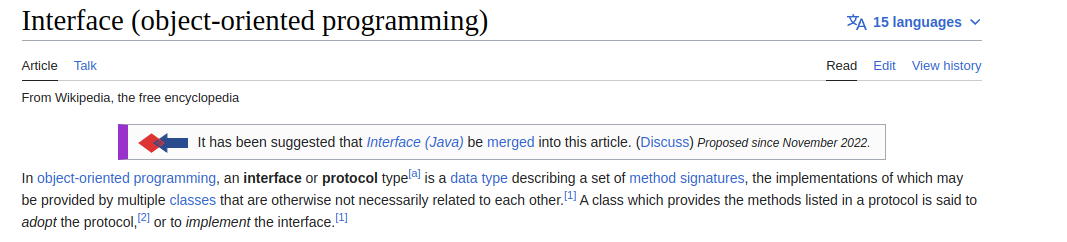

Для начала нам интересно только то, что "**interface** ... describing **a set of method signatures**". В питоне нет отдельных инструкций для создания интерфейсов или специальных типов данных, они задаются через абстрактные классы про которые мы поговорим в конце лекции

Говоря простым языком, **интерфейс** - это набор методов определённого вида. Если объект определяет методы интерфейса, то говорят, что объект **implements (имплементирует, реализует)** данный интерфейс

### Пример 1

Осознать концепцию только по определению довольно сложно, поэтому давайте рассмотрим это на примерах

Рассмотрим интерфейс `Callable`. `Callable` это один из "стандартных" интерфейсов в питоне, ещё есть `Iterable`, `Collection` и т.д. По названию понятно, что `Callable` имеет какое-то отношение к объектам, которые мы можем вызывать.

Объекты с интерфейсом `Callable` в питоне должны уметь "вызываться" при помощи скобочек. Для того, чтобы сделать данный интерфейс нам необходимо определить для объекта метод `__call__`, который выполняется при вызове

In [10]:
from operator import add, sub


class Add:
    def __call__(self, operand1, operand2):
        return operand1 + operand2
    
class Subtract:
    def __call__(self, operand1, operand2):
        return operand1 - operand2
    
class Divide:
    def __call__(self, operand1, operand2):
        return operand1 / operand2
    
class Multiply:
    def __call__(self, operand1, operand2):
        return operand1 * operand2
    
class SomeRandomClass:
    def __call__(self, operand1, operand2):
        return "....."
    
class Matmul:
    def multiply_matrices(self, operand1, operand2):
        return operand1 @ operand2
    
print(hasattr(add, "__call__"))
print(hasattr(sub, "__call__"))

True
True


В примере выше мы написали несколько классов, а также импортировали две функции. Мы видим, что функции `add` и `sub`, а также классы `Add`, `Subtract`, `Divide` и `Multiply` **реализуют** интерфейс `Callable`, так как у них определены методы `__call__`. Класс `Matmul` не реализует данный интерфейс, так как у него не определён метод `__call__`. Давайте запустим этот код

In [11]:
objects = [add, sub, Add(), Subtract(), Divide(), Multiply(), SomeRandomClass(), Matmul()]
for obj in objects:
    result = obj(7, 4)   # Это эквивалентно obj.__call__(7, 4) 
    print(result)

11
3
11
3
1.75
28
.....


TypeError: 'Matmul' object is not callable

Мы видим, что вызов `obj(7, 4)` для всех заданных нами объектов, кроме `Matmul()` прошёл успешно, так как все они **реализуют** метод `__call__` для "взаимодействия со скобочками", но не `Matmul`. Даже в тексте ошибки питон пишет нам, что `Matmul` это не `Callable`.

Также обратите внимание, что интерфейсу совершенно всё равно, что делают наши методы. Самое главное, чтобы они имели метод `__call__`. Мы хорошо видим это на примере класса `SomeRandomClass`, который по логике работы отличается от остальных, но также как и все реализует интерфейс

На самом деле, интерфейс, который мы описали выше это не только `Callable`. Вспомним определение из википедии, там была фраза "...a set of method **signatures**", т.е. при определении интерфейса **имеет значение не только название метода, но и его "сигнатура"** (набор аргументов, которые он принимает и возвращаемых значений всместе с их типами)

Иначе говоря, если бы мы переписали класс `Add` следующим образом, то он перестал бы соответствовать интерфейсу, заданному классами выше, т.к. принимает другое количество аргументов, но при этом он всё ещё будет соответствовать интерфейсу `Callable`, так как по-прежнему будет иметь метод `__call__`

In [12]:
class Add:
    def __call__(self, operand1, operand2, operand3):
        return operand1 + operand2 + operand3

objects = [add, sub, Add(), Subtract(), Divide(), Multiply(), SomeRandomClass(), Matmul()]
for obj in objects:
    result = obj(7, 4)
    print(result)

11
3


TypeError: __call__() missing 1 required positional argument: 'operand3'

На этапе вызова объекта `Add()` происходит ошибка, так как в нашем коде мы ожидаем объекты, реализующие интерфейс `Callable с двумя позиционными аргументами`, но получаем объект, не соответствующий этому интерфейсу.

Тем не менее, если бы третий аргумент в `Add()` был бы со значением по-умолчанию, то код отработал бы без ошибок, а класс `Add` успешно реализовывал бы интерфейс `Callable с двумя позиционными аргументами`

In [14]:
class Add:
    def __call__(self, operand1, operand2, operand3=0):
        return operand1 + operand2 + operand3

objects = [add, sub, Add(), Subtract(), Divide(), Multiply(), SomeRandomClass()]
for obj in objects:
    result = obj(7, 4)
    print(result)

11
3
11
3
1.75
28
.....


На самом деле, когда мы писали dunder методы в предыдущем разделе, мы как раз занимались **имплементированием интерфейсов**, которые требуются для взаимодействия со встроенными в питон объектами.

Так например:
1. Функция `len` требует от объектов реализовывать интерфейс `Sized` (определить метод `__len__`)
2. Оператор `in` требует от объектов реализовать интерфейс `Container` (определить метод `__contains__`)
3. Цикл `for` требует от объектов реализовать интерфейс `Iterable` (определить метод `__iter__`, об этом будет подробно в одной из следующих лекций)

Интересный факт! В питоне есть встроенная функция для проверки того, является ли объект `Callable`

In [17]:
callable(lambda: 1)

True

In [19]:
callable(Add())

True

In [18]:
callable(1)

False

### Пример 2

Но интерфейсы это далеко не всегда наборы dunder методов для взаимодейсвтия со встроенными в питон операторами и функциями. Мы сами можем задавать какие угодно наборы методов.

Например, многие из вас слышали подобную фразу: "В питоне утиная типизация (duck typing). Это значит, что если что-то плавает как утка и крякает как утка, то значит это утка". Мне всегда не нравилась эта фраза, так как она звучит прикольно, но не понятно. Давайте напишем код с утками и разберёмся в этом

In [25]:
class Duck:
    def quack(self):
        print("Quack!!!")
    
    def swim(self):
        print("Swim")

Ну вот, мы написали утку, которая умеет крякать и плавать

In [26]:
class Car:
    def quack(self):
        print("Bee-beep!!!")
    
    def swim(self):
        print("Cars can't swim")

Также мы написали машину, которая тоже умеет "крякать" и "плавать"

In [27]:
def quack_and_swim(obj):
    obj.quack()
    obj.swim()

objects = [Duck(), Car()]
for obj in objects:
    quack_and_swim(obj)

Quack!!!
Swim
Bee-beep!!!
Cars can't swim


В языках со статической типизацией в функциях обязательным требованием является указание типов аргументов и возвращаемых значений. В питоне таких правил нет, вместо этого мы видим, что данная функция подразумевает, что у объекта `obj` есть методы `quack` и `swim`, т.е. данная функция будет работать абсолютно с любым объектом, имеющим данный набор методов вне зависимости от его типа. И мы с вами уже знаем, что набор методов по сути определяет **интерфейс**.

Получается, что наша функция `quack_and_swim` ожидает объект, реализующий интерфейс `крякать и плавать`). Т.е. суть утиной типизации именно в том, что поведение объекта во многом определяется не его типом, а тем какие методы у него есть (какой интерфейс он реализует). Тогда изначальный тезис можно немного перефразировать "Если что-то реализует интерфейс 'Утка', значит это утка".

❗**Маленький дисклеймер**❗

Весь текст выше, который касается интерфейсов, это моя вольная интерпретация, в которой некоторые моменты намерено опущены, а некоторые немного искажены относительно действительности. Всё это сделано для простоты понимания, так как эта тема довольно сложная, все детали вам знать не обязательно.

# Абстрактные классы

## Теория

До сих пор мы говорили об интерфейсах как о чём-то, что не имеет конкретного воплощения в питоне. Для нас это были просто абстрактные наборы методов, которые мы никак не могли задать в форме питоновского объекта.

Тем не менее в питоне всё-таки есть возможность задавать интерфейсы в виде чего-то более "осязаемого". Это делается при помощи **абстрактных классов**

Документация питона даёт [следующее определение](https://docs.python.org/3/glossary.html#term-abstract-base-class)

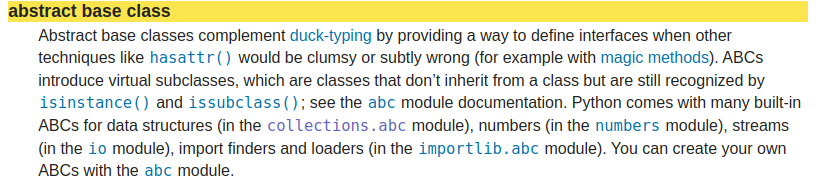

## Создание абстрактного класса

Давайте создадим интерфейс `Duck` при помощи абстрактных классов, а затем разберём данный код

In [46]:
from abc import ABC, abstractmethod


class Duck(ABC):
    @abstractmethod
    def quack(self):
        pass
    
    @abstractmethod
    def swim(self):
        pass
    
    def non_abstract_method(self):
        return "I'm not an abstract method!"

В коде выше мы задали интерфейс `Duck` при помощи абстрактного класса, здесь нужно отметить несколько особенностей:
1. Мы унаследовали наш класс от специального класса `ABC` из модуля `abc`, это обязательное условие создания абстрактного класса
2. Мы применили к нашим методам **декоратор** `abstractmethod` из того же модуля. Про декораторы у нас будет отдельная лекция. Пока просто запомните, что это штука, которая модифицирует поведение функции и применяется путём постановки над сигнатурой функции с символом `@` перед именем декоратора.
3. Мы не писали никакого кода внутри методов, так как **интерфейс - это набор _сигнатур_ функций**. Т.е. нужно указать **аргументы методов**, но не их код. На самом деле это логично, так как мы заранее не знаем, **как именно будут крякать наши "утки" и как именно они будут плавать**
4. У нас есть один метод, который не был помечен как абстрактный и внутри него есть код, позже мы посмотрим, чем они отличаются

У абстрактных классов есть одна особенность - мы не можем создать их экземпляры.

In [47]:
Duck()

TypeError: Can't instantiate abstract class Duck with abstract methods quack, swim

Ошибка говорит сама за себя. Дело в том, что абстрактные классы это что-то вроде чертежей по которым можно собрать настоящий работающий класс

Давайте же соберём несколько классов по данному чертежу, для этого нам будет необходимо унаследовать наши классы от класса `Duck`

In [41]:
class Car(Duck):
    pass

class Frog(Duck):
    pass

Наследование мы сделали, давайте попробуем создать экземпляры данных классов

In [43]:
Car()

TypeError: Can't instantiate abstract class Car with abstract methods quack, swim

И мы получаем такую же ошибку. В чем же дело?

## Имплементация абстрактных методов

И тут мы подходим к главной особенности абстрактных классов. Для того, чтобы успешно создать экземпляр абстрактного класса (или его наследника), нам нужно **имплементировать его интерфейс**, иначе говоря, переопределить все его методы, помеченные как абстрактные.

In [51]:
class Car(Duck):
    def quack(self):
        print("Bee-beep")
        
    def swim(self):
        print("...")

class Frog(Duck):
    def quack(self):
        print("Croak")
        
    def swim(self):
        print("A frog swims...")

In [52]:
car = Car()
frog = Frog()

car.quack()
car.swim()

frog.quack()
frog.swim()

Bee-beep
...
Croak
A frog swims...


После того, как мы переопределили все абстрактные методы, наш код заработал! При этом полученные объекты ничем не отличаются от обычных питоновских объектов.

Абстрактный класс всего навсего вынуждает нас создавать дочерние классы по строгому чертежу и это вовсе не плохо. Абстрактные классы способны очень хорошо структурировать код больших проектов, в которых имеется много разных классов.

Кстати, помните, что мы также создавали внутри абстрактного класса самый обычный неабстрактный метод? Так вот, его можно использовать в потомках как самый обычный метод и его не нужно переопределять как абстрактный

In [62]:
car.non_abstract_method()

"I'm not an abstract method!"

## Абстрактные классы описывают интерфейс

В стандартной библиотеке питона есть [большая коллекция уже написанных абстрактных классов](https://docs.python.org/3/library/collections.abc.html#collections-abstract-base-classes), наиболее часто используемые есть в модуле `collections.abc`

In [64]:
from collections.abc import Iterable, Sized, Container   # И многие другие

Данные классы интересны тем, что позволяют проверять соответствие интерфейсу при помощи `isinstance` не прибегая к наследованию. О чем же речь?

In [66]:
class S1:    # Этот класс реализует интерфейс Sized (но не наследуется от Sized!!!)
    def __len__(self):
        return 2

    
class S2:    # Этот класс также реализует интерфейс Sized (но не наследуется от Sized!!!) и ещё Iterable (также без наследования)
    def __len__(self):
        return 2
    
    def __iter__(self):
        return 2
    

class S3:    # Этот класс реализует интерфейс Container (но не наследуется от Container!!!)
    def __contains__(self, obj):
        return True

При помощи `isinstance` мы можем проверять соответствуют ли наши классы интерфейсам из `collections.abc`, не наследуясь от данных классов в явном виде

In [69]:
print(isinstance(S1(), Sized))
print(isinstance(S2(), Sized))
print(isinstance(S3(), Sized))

True
True
False


In [70]:
print(isinstance(S1(), Iterable))
print(isinstance(S2(), Iterable))
print(isinstance(S3(), Iterable))

False
True
False


In [71]:
print(isinstance(S1(), Container))
print(isinstance(S2(), Container))
print(isinstance(S3(), Container))

False
False
True


Круто, а зачем это нужно?

Это нужно, чтобы сделать ваш код более гибким. Вспомним ДЗ fastq-filtrator, код, где нужно было преобразовывать bounds в зависимости от типа.

Как писали многие из вас (и это вполне нормальный вариант)

In [144]:
def gc_content(sequence, bounds):
    if isinstance(bounds, float):
        lower_bound, upper_bound = 0, bounds
    elif isinstance(bounds, tuple):
        lower_bound, upper_bound = bounds
        
    return "Success"  # Опустим сам расчёт GC

Код работает, но он не очень гибок. Например, код также должен работать при передаче объекта типа `int` в аргумент `bounds` или если мы передадим `list`. Вообще, когда мы видим данный аргумент впервые, мы скорее всего ожидаем, что он принимает `контейнер из двух упорядоченных чисел или одно число`, но на практике обрабатывается только случай с `float` и `tuple`. Абстрактные классы могут помочь нам избавится от данной проблемы

In [185]:
from decimal import Decimal
from numbers import Number   # В модуле numbers тоже хранятся абстракные классы, но не для коллекций, а для чисел
from collections.abc import Iterable

import numpy as np

In [174]:
def gc_content(sequence, bounds):
    if isinstance(bounds, Number):   # Если `bounds` - число, то это верхняя граница
        lower_bound, upper_bound = 0, bounds
    elif isinstance(bounds, Iterable):   # Если `bounds` - итерируемый объект, то первый элемент это нижняя граница, а второй - верхняя
        lower_bound, upper_bound = bounds
    else:
        raise TypeError("Invalid type")
        
    return "Success"  # Опустим сам расчёт GC

In [175]:
gc_content("ATGC", 1)   # Тип int

'Success'

In [176]:
gc_content("ATGC", 1.0)   # Тип float

'Success'

In [177]:
gc_content("ATGC", Decimal(4))   # Тип Decimal, он тоже соответствует интерфейсу Number

'Success'

In [178]:
gc_content("ATGC", (1, 2))   # Тип tuple

'Success'

In [179]:
gc_content("ATGC", [1, 2])   # Тип list

'Success'

In [180]:
gc_content("ATGC", np.array([1, 2]))   # Тип np.ndarray

'Success'

In [181]:
gc_content("ATGC", map(lambda x: x + 1, [1, 2]))   # Тип map object

'Success'

In [182]:
class MyCoolTwoItemCollection:
    def __init__(self, collection):
        self.__collection = collection
        
    def __repr__(self):
        return str(self.__collection)
    
    def __len__(self):
        return len(self.__collection)

gc_content("ATGC", MyCoolTwoItemCollection([1, 2]))   # Тип MyCoolTwoItemCollection

TypeError: Invalid type

Здесь произошла ошибка, так как наш тип `MyCoolTwoItemCollection` не реализует интерфейс `Iterable`, так как у него нет метода `__iter__`.

В итоге, благодаря абстрактным классам, наш код стал намного более гибким, а функция стала принимать большое число разнообразных объектов.

"Если по чему-то можно итерироваться, значит это границы для GC-состава" ©Конфуций

Абстрактные классы из стандартной библиотеки не покрывают всех потребностей и при желании можно было бы написать куда более подробный интерфейс, но так делать вовсе не обязательно. Например, `неотрицательное, некомплексное число меньшее или равное 100 или упорядоченная, итерируемая коллекция из двух неотрицательных, некомплексных чисел меньших или равных 100, где первое число меньше или равно второму`

## Итог по абстрактным классам

Абстрактные классы используются для описывания интерфейсов. С их помощью можно делать шаблоны для классов, при имплементировании методов в которых вы автоматически реализуете необходимый интерфейс. Абстрактные классы крайне полезны для структурирования кода в больших проектах

## Так что там в итоге по полиморфизму?

Это концепция, которая описывает всё то, что мы обсуждали в этом разделе. Один и тот же код в питоне может работать с данными совершенно разных типов, в случае, если они реализуют одинаковый интерфейс, необходимый для вашей задачи 

Вспомним пример с машиной и уткой

In [ ]:
def quack_and_swim(obj):
    obj.quack()
    obj.swim()

objects = [Duck(), Car()]
for obj in objects:
    quack_and_swim(obj)

Работоспособность функции `quack_and_swim` зависит не от типа `obj`, а от того, какие методы он имеет. Способность кода (в нашем случае функции) обрабатывать данные разных типов и есть **полиморфизм** 

Аналогично, функция `len` обладает свойством полиморфизма, так как она может работать с огромным количеством различных объектов разных типов в питоне

# Доп материалы

По продвинутому ООП есть две крутейшие лекции. Там разбирается то, что мы проходили и ещё куча всякой магии

1. https://youtu.be/2Sh4OLSpa9Y - база
2. https://youtu.be/bt6kU1kuHWA - магия